In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import copy

In [18]:
class Model:
    
    def __init__(self,n,p,g):
        self.n = n
        self.p = p
        self.g = g
        self.nl = torch.tanh
        
        self.x = torch.randn(self.n)
        self.w_in = nn.Linear(1,self.n,bias=False) ## input injection weights
        self.w_out = nn.Linear(self.n,1,bias=False) ## readout weights
        self.y = self.w_out(self.x)
        
        self.r = torch.empty(self.n,self.n).uniform_(-1,1) ## reservoir weights
        self.r[torch.rand(self.r.shape) > self.p] = 0
        
        max_eig = np.max(np.abs(np.linalg.eigvals(self.r.detach().numpy())))
        self.r = self.r * (self.g / max_eig)
        
        self.xhist = []
        self.yhist = []
        self.injections = []
        
    ## Used to inject input values into reservoir
    def inject(self,val):
        self.xhist.append(self.x.detach().numpy())
        self.x = self.nl(torch.matmul(self.r, self.x) + self.w_in(val))
        
        self.yhist.append(self.y.detach().numpy())
        self.y = self.w_out(self.x)
        
    def forward(self):
        self.xhist.append(self.x.detach().numpy())
        self.x = self.nl(torch.matmul(self.r, self.x))
        
        self.yhist.append(self.y.detach().numpy())
        self.y = self.w_out(self.x)
        
    def plot_history(self,start=0,end=-1):
        fig,ax = plt.subplots(2,1,sharex=True)
        fig.set_figheight(7)
        fig.set_figwidth(15)
        xs = np.vstack(self.xhist)
        ys = np.asarray(self.yhist)
        ax[0].imshow(xs.T[:,start:end],cmap='inferno')
        ax[1].plot(ys[start:end])
        plt.show()
    
    def reset(self):
        self.xhist = []
        self.yhist = []
        self.injections = []

In [7]:
## Quickly duplicate a network instance
def duplicate(m):
    m_p = Model(m.n,m.p,m.g)
    m_p.nl = m.nl
    m_p.x = m.x
    m_p.y = m.y
    m_p.w_in = m.w_in
    m_p.w_out = m.w_out
    m_p.r = m.r
    return m_p

### Instantiate model (i.e. set initial conditions) and duplicate it

In [8]:
n, p, g = 500, 0.05, 1.5
m = Model(n, p, g)
m_p = duplicate(m)

### Sanity check -- both models output same trajectory

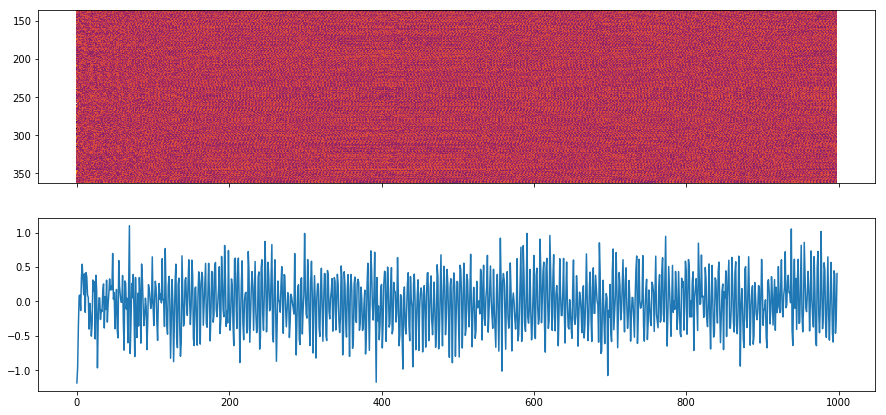

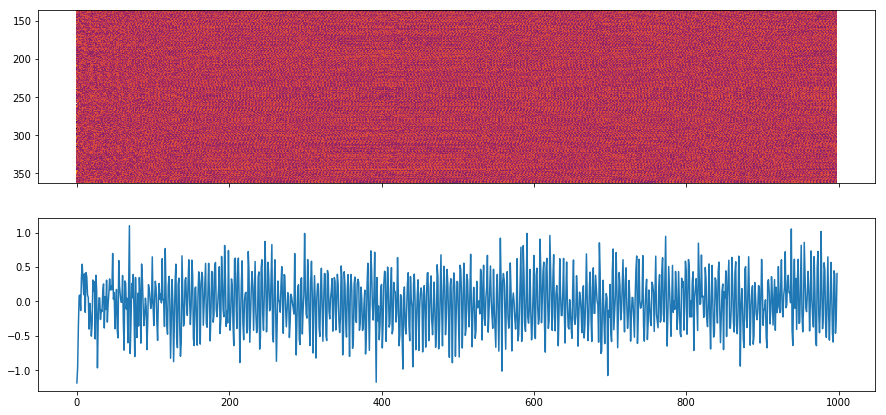

Summed, step-wise difference in trajectories: 0.0


In [9]:
steps = 1000
inject_val = torch.tensor([1000.])

for s in range(steps):
    m.forward()
    m_p.forward()
    
m.plot_history()
m_p.plot_history()

print("Summed, step-wise difference in trajectories: {}".format(np.sum(np.asarray(m.yhist) - np.asarray(m_p.yhist))))

### Same experiment, except inject input into one of the two. Curious to play around with and see how trajectories change on initial conditions by perturbing w/input

In [10]:
m = Model(n, p, g)
m_p = duplicate(m)

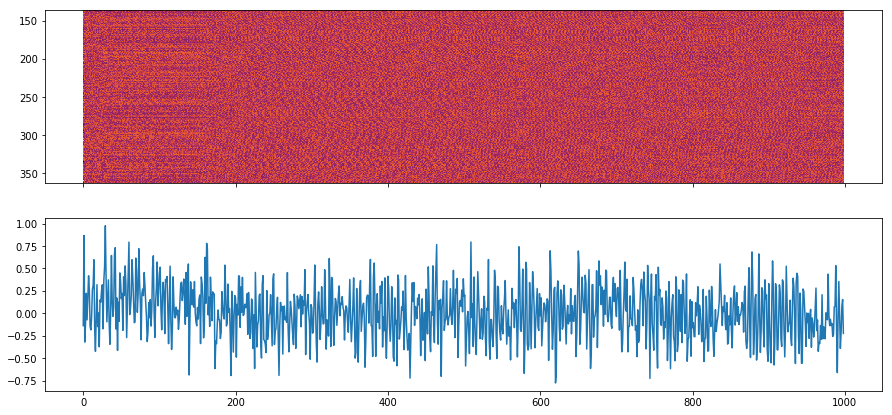

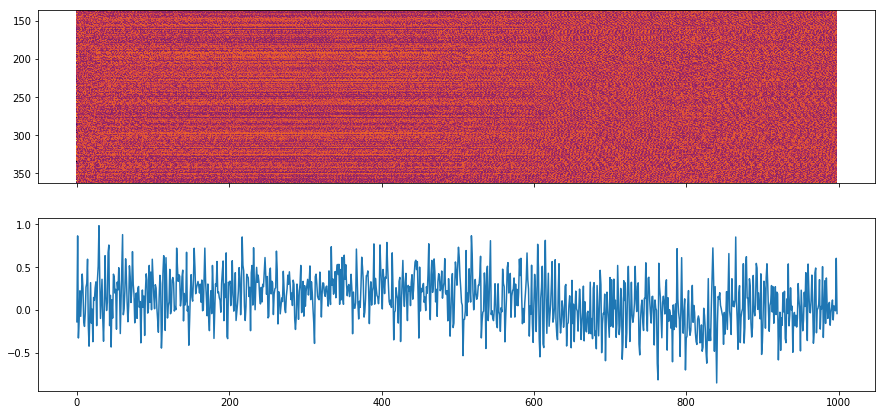

Summed, step-wise difference in trajectories: -111.23625183105469


In [11]:
steps = 1000
inject_val = torch.tensor([0.01])

for s in range(steps):
    if (s == 0):
        m_p.inject(inject_val)
    else:
        m_p.forward()
    m.forward()
    
m.plot_history()
m_p.plot_history()

print("Summed, step-wise difference in trajectories: {}".format(np.sum(np.asarray(m.yhist) - np.asarray(m_p.yhist))))

### Confirmed: doesn't take much perturbation to disrupt inherent trajectory

# Now to train reservoir synapses of network towards inherent trajectory. 

### Goal is to leverage computational power of RNNs with high gain (capacity to express complex, arbitrary functions) without suffering chaotic tendencies of high gain networks. In other words, can we train networks with infinite potential to create reproducible behavior?

SyntaxError: unexpected EOF while parsing (<ipython-input-119-468a5c668a23>, line 2)

In [20]:
n, p, g = 500, 0.05, 1.5
m = Model(n, p, g)

In [22]:
steps = 1000
for s in range(steps):
    m.forward()

innate_traj = m.xhist

In [24]:
class ForceInnate:
    def __init__(m, a, innate):
        self.a = a
        self.P = torch.eye(m.n) / self.a
        self.m = m
        self.innate = innate
        self.ctr = 0
        self.plastic = 0.60
        
    def error(self):
        self.m.x - self.innate[self.ctr]
        
    def update(self):
        return (self.m.r - )
        

SyntaxError: unexpected EOF while parsing (<ipython-input-24-f6a83d0beafe>, line 8)

# Implementing Full Force Learning

### Succinctly, we are setting up a reservoir network that includes feedback. We'll run this network 